# Analysing Titanic data
We'll read the data and try to predict the survival of the passenges of Titanic from it.


At first, we want to have a general look at the data. Just reading the data as pandas and using the variable allows to take a first look at the data!


In [233]:
import pandas as pd;
titanic= pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [234]:
#how to "take a look" at the variable in pandas???? Just use the variable name!!!
#titanic

# Taking a deeper look at the data
With describe() (see below), we will see all the numerical values (like this, it is clear which ones are not numerical, and we can identify the ones to convert).
We can als check if all the values are defined (-->count compared to the number of rows above).

In [235]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Only the numerical data is shown in the above table. In order to make more columns usable for the analysis, we'll transform them to the numerical format.

In [236]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Asking some free questions about the data

In [237]:
#how many passenger are in our records?
print(len(titanic))
print(len(titanic_test))

891
418


In [238]:
#how many survived? - we only check the training data. In fact, we do not have any "survived" labels for the test data
print(titanic['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [239]:
#how many were in first class?
len(titanic.loc[titanic['Pclass']== 1])

216

# Filling not available values

In [240]:
print(titanic["Embarked"].unique()) # let's check which values "Embarked" has
titanic["Embarked"].value_counts() # value counts is like a quick histogram!!

['S' 'C' 'Q' nan]


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [241]:
titanic['Embarked'] = titanic['Embarked'].fillna('S') #let's fill the not available values with the most frequent value

In [242]:
titanic_test['Embarked'].unique() #in titanic test, all the embarked fields are filled

array(['Q', 'S', 'C'], dtype=object)

In [243]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic_test['Age'] = titanic_test['Age'].fillna(titanic['Age'].median())

# Changing categorical values to numerical values

In [244]:
titanic.loc[titanic['Embarked']=='S','Embarked'] = 0;
titanic.loc[titanic['Embarked']=='C','Embarked'] = 1;
titanic.loc[titanic['Embarked']=='Q','Embarked'] = 2;

In [245]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0 #we access .loc(row, column)
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [246]:
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

titanic_test['Embarked'].fillna('S')
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

titanic_test['Age'] = titanic_test['Age'].fillna(titanic['Age'].median())
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())

In [248]:
titanic.describe() #check that all the values are defined --> the strange thing is that "Embarked" is still not there!!!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
titanic.shape[0] #this s a way to ask for a size in the first dimension (rows). another way to do the same thing len(titanic)

891

In [175]:
titanic.shape[1] # this is a way to ask for a number of columns

12

In [176]:
len(titanic.columns)

12

# Linear regression

In [249]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import *

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

#since we do not have the test set labels, let's split the titanic data into train and test.
X_train, X_test, y_train, y_test = train_test_split(titanic[predictors], titanic['Survived'], test_size=0.2, random_state=0)

# Initialize our algorithm class
model = LinearRegression()# Using linear regression
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
print(sum(y_test == pred)/y_test.shape[0])

0.793296089385


In [264]:
def apply_linear_regression (predictors): 
    #remember!!! In python you do not need to declare return param
    #let's split the titanic data into train and test.
    X_train, X_test, y_train, y_test = train_test_split(titanic[predictors], titanic['Survived'], test_size=0.2, random_state=0)

    model = LinearRegression()# Using linear regression
    model.fit(X_train, y_train)
    display(model.coef_)
    pred = model.predict(X_test)
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0
    return sum(y_test == pred)/y_test.shape[0]

In [266]:
#just using sex gives us almost as good result as for all the other data
display(apply_linear_regression(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]))

array([ -1.66417685e-01,   5.06025236e-01,  -6.30502396e-03,
        -4.71955029e-02,  -1.03193619e-02,   2.97623077e-04,
         3.83873950e-02])

0.79329608938547491

In [268]:
display(apply_linear_regression(["Sex"]))

array([ 0.55354142])

0.78770949720670391

# Logistic regression

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation;
model = LogisticRegression(random_state=1)
#use cross validation on 3 folds
#
alg = LogisticRegression(random_state=1)
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#predictors = ["Sex"]
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.787878787879


# Creating the Kaggle submission

In [252]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
pred = model.predict(titanic_test[predictors])
print(pred)

[ 0.14692843  0.44992378  0.14051102  0.11768932  0.5988037   0.19982205
  0.68126674  0.23895008  0.71842059  0.0657379   0.11115611  0.33588928
  0.95648083  0.01509068  0.79888288  0.8059114   0.31153909  0.19347903
  0.57629956  0.54818369  0.28027657  0.21922594  0.95709643  0.53211258
  0.85988893 -0.07278435  1.03201136  0.18402149  0.3687537   0.05925476
  0.097056    0.21542804  0.52159562  0.55397641  0.43741109  0.20924284
  0.61722724  0.6615447   0.13054863  0.12562059  0.07151203  0.4495434
  0.02917717  0.77250811  0.80892718  0.13007988  0.3816829   0.18788751
  0.80699954  0.54848467  0.43752349  0.3243905   0.73382422  0.86371638
  0.31824795  0.10863826  0.06702095  0.12999803  0.06640237  1.0137028
  0.18051138  0.25402164  0.17416296  0.73173545  0.53766339  0.78749915
  0.75700144  0.33446527  0.46960725  0.7357079   0.71913284  0.15529128
  0.61088502  0.48512674  1.00486625  0.51460358  0.11120201  0.69068901
  0.26648288  0.71913284  0.2329267   0.21455668  0.3

In [179]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": pred
    })
submission.to_csv('kaggle.csv', index = False);

# Kaggle specificity: we do not have the labels for the test set!!!

In [180]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


# Using cross-validation



In [181]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:]) #take only the "train" rows, and all the columns
    # The target we're using to train the algorithm.
    train_target = titanic["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [182]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [183]:
from sklearn.cross_validation import *;
model = LinearRegression();
scores = cross_val_score(model, titanic[predictors],titanic['Survived'] , cv=5)

# Summary

The data that we have is not really good for linear regression. There is not even one attribute that is real-valued and that shows some kind of linear relationship to the "survived". Anyways, the problem really looks like a classification problem (Survived/Not survived). One can argue that classification is same thing as linear regression, but somehow it does not feel well. Apparently, it still does not work too bad.
However, why do we use cross-validation in this case? Because we do not have too much data? Not sure, but it

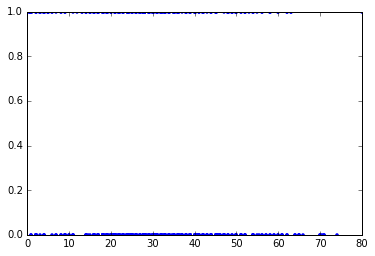

In [184]:
import matplotlib.pyplot as plt
plt.plot(titanic['Age'], titanic['Survived'], '.')

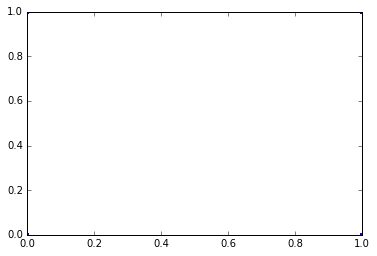

In [185]:
plt.plot(titanic['Sex'], titanic['Survived'],'.')

# Improving the score
Things to do in order to improve the score:
- use different algorithm
- tune the parameters of the algorithm (e.g., for random forests, the number of trees etc.)
- use different features

# using Random forest

In [284]:
from sklearn.ensemble import RandomForestClassifier
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)
print(scores.mean())

0.820426487093


# Adding new features

In [287]:
titanic['familySize'] = titanic['Parch'] + titanic['SibSp']
titanic['nameLen'] = titanic['Name'].apply(lambda x: len(x))

In [288]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'familySize',
       'nameLen'],
      dtype='object')